In [1]:
# 머신러닝 : 지도/비지도 학습

# k 최근접 이웃 알고리즘
# - 지도 학습
# - 길이, 무게 : 입력 데이터
# - 정답 : target
# - 훈련 데이터 : 입력 데이터 + target 데이터

# 올바른 학습
# - 훈련 데이터, 테스트 데이터 분리 (이전 파이썬 자료(20220228)에서는 이것이 선행되지 않음)

In [3]:
import random as rd

A_len = []
A_wei = []
for i in range(35):
    A_len.append(rd.uniform(20,45)) # 실수 범위 지정
    A_wei.append(rd.uniform(200,950))

# 정렬하기 (디폴드값 : 오름차순)
A_len.sort()
A_len.sort()

# ====================================================

B_len = []
B_wei = []
for i in range(14):
    B_len.append(rd.uniform(9,15)) # 실수 범위 지정
    B_wei.append(rd.uniform(6,20))

# 정렬하기 (디폴드값 : 오름차순)
B_len.sort()
B_len.sort()

length = A_len + B_len
weight = A_wei + B_wei

In [5]:
# 데이터 프레임 형태 생성
data = [[w, l] for w, l in zip(length, weight)]
data[:10]

[[20.220364282232875, 241.59228945650074],
 [20.30220801585383, 580.2358352172421],
 [21.449477668692218, 484.4596847795001],
 [22.70022825742012, 290.6599422728797],
 [22.934006098658674, 887.7776797506958],
 [23.858498144681157, 799.5098332463366],
 [24.14762475864375, 432.3997264948217],
 [26.10147888353108, 515.9095312775414],
 [26.2274446220017, 350.7923627059968],
 [27.076735390806, 635.8837580268337]]

In [6]:
# 타깃 데이터 생성
target = [1] * 35 + [0] * 14

In [10]:
# 동일한지 확인
print(len(data))
print(len(target))

49
49


In [32]:
# 8:2로 데이터를 학습용과 테스트용으로 분리하기
idx = int(len(data) * 0.8)
print(idx) #개수 확인

train = data[:35] # 8 (0부터 38) # 0부터 시작하기 때문에 38까지 총 39개인 것
test = data[35:] # 2 (39부터 ~)

# 정답
train_target = target[:35]
test_target = target[35:]

# 35개를 기준으로 하게 되면 0% !!!
# - 전체 39개 중에서 훈련데이터와 타깃데이터로 분류하여 사용해야 하는데,
# - 섞지 않고 기존 데이터 35개 만큼, 나머지 35개부터 순차적으로 실행하게 되면
# - 결과적으로 A 데이터만 학습하게 되므로, B는 학습하지 않은 상태로 실행됨
# - A 데이터만 맞추는 꼴

39


In [33]:
len(train), len(train_target)

(35, 35)

In [34]:
len(test), len(test_target)

(14, 14)

In [35]:
from sklearn.neighbors import KNeighborsClassifier 

In [36]:
kn = KNeighborsClassifier()
kn.fit(train, train_target)
kn.score(test, test_target)

0.0

In [53]:
# 넘파이를 이용하여 데이터 생성 (좀 더 효율적)
import numpy as np
input_arr = np.array(data) # 전체 데이터를 넘파이 배열로 바꿔준 변수
target_arr = np.array(target) # 전체 타깃 데이터를 넘파이 배열로 바꿔준 변수

# np.column_stack((length, weight))
# data[:6]

In [57]:
input_arr.shape

(49, 2)

In [58]:
target_arr.shape

(49,)

In [55]:
# target = np.concatenate( (np.ones(35), np.zeros(14)) ) # 35개 만큼의 배열 생성
#          # concatenate는 튜플 형태로 코드를 작성해야 함
# target[:6]

In [67]:
np.random.seed(42) # seed : 유사난수 생성기 (언급이 없으면 실행 시 마다 값이 달라짐)
                   #        첫 번째 출력값(랜덤값)을 고정시켜주는 역할로, 아무값이나 임의로 넣어주면 됨
                   #        따로 적어주면 seed가 실행 안됨
idx = np.arange(49)
np.random.shuffle(idx) # 넘파이 형태의 리스트 값을 랜덤으로 섞기

In [68]:
idx

array([13, 45, 47, 44, 17, 27, 26, 25, 31, 19, 12,  4, 34,  8,  3,  6, 40,
       41, 46, 15,  9, 16, 24, 33, 30,  0, 43, 32,  5, 29, 11, 36,  1, 21,
        2, 37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [70]:
type(input_arr)

numpy.ndarray

In [81]:
input_arr

array([[ 20.22036428, 241.59228946],
       [ 20.30220802, 580.23583522],
       [ 21.44947767, 484.45968478],
       [ 22.70022826, 290.65994227],
       [ 22.9340061 , 887.77767975],
       [ 23.85849814, 799.50983325],
       [ 24.14762476, 432.39972649],
       [ 26.10147888, 515.90953128],
       [ 26.22744462, 350.79236271],
       [ 27.07673539, 635.88375803],
       [ 28.20543791, 816.01166788],
       [ 28.4326487 , 695.1007701 ],
       [ 29.14410258, 413.28103184],
       [ 29.64271   , 544.5964261 ],
       [ 29.72397505, 260.92469172],
       [ 31.31967966, 458.09676375],
       [ 31.33813057, 443.85993515],
       [ 31.53526866, 221.43765185],
       [ 32.03446358, 550.79019772],
       [ 32.70729615, 300.73736964],
       [ 34.10031785, 758.23578948],
       [ 35.18850296, 320.26211375],
       [ 35.73398719, 204.6562196 ],
       [ 36.21807759, 590.90255786],
       [ 36.35080789, 750.29049641],
       [ 36.51590235, 243.82746753],
       [ 36.91170878, 444.29907664],
 

In [72]:
idx[:35]
idx[35:]

array([37, 35, 23, 39, 10, 22, 18, 48, 20,  7, 42, 14, 28, 38])

In [100]:
train = input_arr[idx[:35]]
train_target = target_arr[idx[:35]]

In [101]:
train.shape, train_target.shape

((35, 2), (35,))

In [102]:
test = input_arr[idx[35:]]
test_target = target_arr[idx[35:]]

In [103]:
test.shape, test_target.shape

((14, 2), (14,))

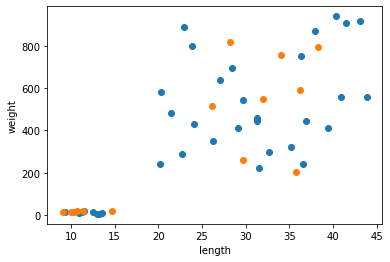

In [106]:
import matplotlib.pyplot as plt
plt.scatter(train[:,0], train[:,1]) # 모든 raw의 길이
plt.scatter(test[:,0], test[:,1]) # 모든 raw의 무게
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [107]:
kn = KNeighborsClassifier()
kn.fit(train, train_target)
kn.score(train, train_target)

1.0

In [108]:
kn.predict(test)

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])

In [109]:
test_target[:14]

array([0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.])